**PROJECT 2**

In [ ]:
Used Movie dataset to perform Exploratory data analysis by merging 5 imdb files together to get better insights.
The link to complete dataset can be found below : 

<a href="https://datasets.imdbws.com/">Link to Complete Dataset</a> </br>
<a href="https://developer.imdb.com/non-commercial-datasets/">Description of dataset</a>

**Data Processing**

Importing all the Required Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import numpy as np

In [45]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

**WARNING ! DONOT RUN THESE CODE UNTIL YOU HAVE A EXCEPTIONAL RAM**

In [ ]:
# # Loading your data into DataFrames.
# titles_ratings = pd.read_csv('title.ratings.tsv', sep='\t')
# titles_episode = pd.read_csv('title.episode.tsv', sep='\t')
# title_crew = pd.read_csv('title.crew.tsv', sep='\t')
# name_basics = pd.read_csv('name.basics.tsv', sep='\t')

# # Exploding the 'knownForTitles' column in the name_basics DataFrame
# name_basics['knownForTitles'] = name_basics['knownForTitles'].str.split(',')
# name_basics = name_basics.explode('knownForTitles')

In [ ]:
# # Merging titles and namebasic DataFrames based on 'tconst'
# merged_df = name_basics.merge(titles_ratings,right_on='tconst', left_on='knownForTitles', how='inner')
# merged_df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,tconst,averageRating,numVotes
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer",tt0072308,tt0072308,7.0,49240
1,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer",tt0050419,tt0050419,7.0,33681
2,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer",tt0053137,tt0053137,7.1,14686
3,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer",tt0027125,tt0027125,7.7,21008
4,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage",tt0037382,tt0037382,7.8,38920


In [ ]:
# mergedDf1=merged_df[['nconst','primaryName','birthYear','deathYear','primaryProfession','tconst','averageRating','numVotes']]
# mergedDf1.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,tconst,averageRating,numVotes
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer",tt0072308,7.0,49240
1,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer",tt0050419,7.0,33681
2,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer",tt0053137,7.1,14686
3,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer",tt0027125,7.7,21008
4,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage",tt0037382,7.8,38920


In [ ]:
# mergedDf1.columns

Index(['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession',
       'tconst', 'averageRating', 'numVotes'],
      dtype='object')

In [ ]:
# #Merging previous file with titlecrew dataframe based on tconst value
# mergedDf2 = mergedDf1.merge(title_crew,on='tconst', how='inner')
# mergedDf2.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,tconst,averageRating,numVotes,directors,writers
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer",tt0072308,7.0,49240,nm0347086,"nm0827827,nm0778743,nm0732631,nm0798103"
1,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer",tt0050419,7.0,33681,nm0002045,"nm0314826,nm0094805"
2,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer",tt0053137,7.1,14686,nm0006452,"nm0668122,nm0796009"
3,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer",tt0027125,7.7,21008,nm0762263,"nm0852313,nm0778818,nm0015801,nm0267022,nm0391..."
4,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage",tt0037382,7.8,38920,nm0001328,"nm0002133,nm0299154,nm0001203,nm0010850,nm0150462"


In [ ]:
# sampled.to_csv('final_dataset.csv', index=False)

In [ ]:
# dftitle=pd.read_csv('title.basics.tsv',sep='\t')
# dffinal=pd.read_csv('final_dataset.csv')

In [7]:
# #Merging the previous file with dftitle dataframe based on tconst value
# DF=dffinal.merge(dftitle,on='tconst', how='inner')

In [9]:
# DF.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,tconst,averageRating,numVotes,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,nm0594426,Sadao Miyamoto,1937,2024,"animation_department,art_department,director",tt0068792,7.8,890,"nm1067871,nm2416695,nm1078078,nm0410963,nm0475...","nm1033745,nm1284525,nm1056287,nm0811998,nm0945...",tvSeries,Gatchaman,Kagaku ninja tai Gatchaman,0,1972,1980,26,"Action,Adventure,Animation"
1,nm0035759,John Armstrong,1914,1987,"actor,soundtrack",tt0042069,6.4,71,"nm0724504,nm0366578,nm0776838,nm0562388","nm1055880,nm2036525,nm0359815,nm2034867,nm0683...",tvSeries,The Adventures of Ellery Queen,The Adventures of Ellery Queen,0,1950,1956,30,"Crime,Drama,Mystery"
2,nm0551310,Philip L. Parslow,1936,2003,"producer,assistant_director,production_manager",tt0111924,5.8,271,"nm0372133,nm0703867,nm0733415,nm0319412,nm0667...","nm0001300,nm0593480,nm0571113,nm0425124,nm0027...",tvSeries,The Client,The Client,0,1995,1996,60,"Crime,Drama,Thriller"
3,nm0761761,Zachary Sanders,1946,1992,"actor,soundtrack",tt0069627,8.2,4425,"nm1656967,nm1219541,nm1738715,nm1146489","nm0014326,nm0022932,nm0108555,nm0137265,nm9646...",tvSeries,Schoolhouse Rock!,Schoolhouse Rock!,0,1973,2009,3,"Animation,Family,Musical"
4,nm0353675,John Haggott,1914,1964,"producer,director",tt0045449,7.9,202,"nm0781751,nm0091575,nm0233071,nm0591523,nm0677...","nm0887966,nm0034356,nm0309380,nm0936536,nm0140...",tvSeries,The United States Steel Hour,The United States Steel Hour,0,1953,1963,60,"Comedy,Drama"


In [11]:
# #Converting our dataframe to excel for EDA.
# DF.to_csv('data.csv', index=False)

In [13]:
# DF.shape

(7664, 18)

**Data Analysis Begins here**

<a href="https://docs.google.com/spreadsheets/d/15FWWjcN1ZKt0bqcsvP08Q-0kKns_lKR4/edit?usp=drive_link&ouid=100647554123593291711&rtpof=true&sd=true">Link To Processed Dataset</a> 

In [5]:
df2 = pd.read_excel('data.xlsx')

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7631 entries, 0 to 7630
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nconst             7631 non-null   object 
 1   primaryName        7631 non-null   object 
 2   birthYear          7631 non-null   int64  
 3   deathYear          7631 non-null   int64  
 4   primaryProfession  7631 non-null   object 
 5   tconst             7631 non-null   object 
 6   averageRating      7631 non-null   float64
 7   numVotes           7631 non-null   int64  
 8   directors          7631 non-null   object 
 9   writers            7631 non-null   object 
 10  titleType          7631 non-null   object 
 11  originalTitle      7631 non-null   object 
 12  startYear          7631 non-null   int64  
 13  endYear            7631 non-null   int64  
 14  runtimeMinutes     7631 non-null   int64  
 15  genres             7631 non-null   object 
dtypes: float64(1), int64(6),

In [55]:
df2.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,tconst,averageRating,numVotes,directors,writers,titleType,originalTitle,startYear,endYear,runtimeMinutes,genres
0,nm0594426,Sadao Miyamoto,1937,2024,"animation_department,art_department,director",tt0068792,7.8,890,"nm1067871,nm2416695,nm1078078,nm0410963,nm0475...","nm1033745,nm1284525,nm1056287,nm0811998,nm0945...",tvSeries,Kagaku ninja tai Gatchaman,1972,1980,26,"Action,Adventure,Animation"
1,nm0035759,John Armstrong,1914,1987,"actor,soundtrack",tt0042069,6.4,71,"nm0724504,nm0366578,nm0776838,nm0562388","nm1055880,nm2036525,nm0359815,nm2034867,nm0683...",tvSeries,The Adventures of Ellery Queen,1950,1956,30,"Crime,Drama,Mystery"
2,nm0551310,Philip L. Parslow,1936,2003,"producer,assistant_director,production_manager",tt0111924,5.8,271,"nm0372133,nm0703867,nm0733415,nm0319412,nm0667...","nm0001300,nm0593480,nm0571113,nm0425124,nm0027...",tvSeries,The Client,1995,1996,60,"Crime,Drama,Thriller"
3,nm0353675,John Haggott,1914,1964,"producer,director",tt0045449,7.9,202,"nm0781751,nm0091575,nm0233071,nm0591523,nm0677...","nm0887966,nm0034356,nm0309380,nm0936536,nm0140...",tvSeries,The United States Steel Hour,1953,1963,60,"Comedy,Drama"
4,nm0918829,Kim Weiskopf,1947,2009,"producer,writer,script_department",tt0072519,7.5,10998,"nm0790281,nm0482457,nm0779641,nm0802278,nm0990...","nm0005131,nm0629447,nm0743690,nm0921935,nm0589...",tvSeries,The Jeffersons,1975,1985,30,Comedy


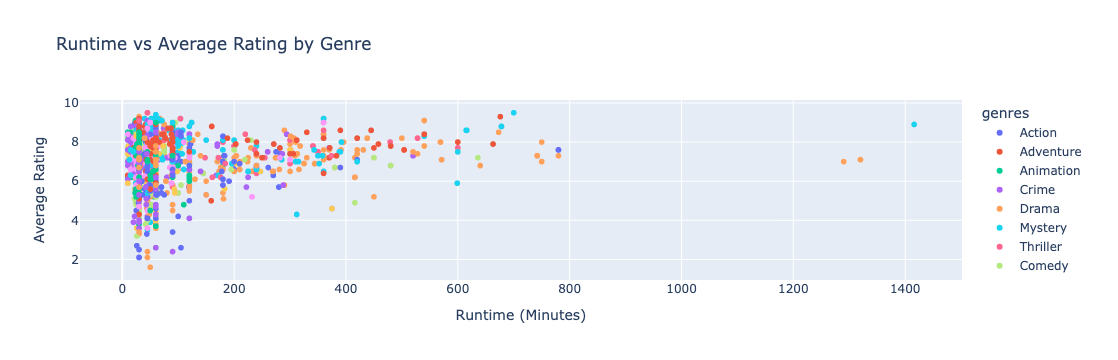

In [39]:

import plotly.express as px

# Calculate age from birthYear
df3['age'] = df3['deathYear'] - df3['birthYear']

# Plot runtime vs average rating, colored by genre
fig = px.scatter(df3, 
                 x='runtimeMinutes', 
                 y='averageRating', 
                 color='genres', 
                 title='Runtime vs Average Rating by Genre',
                 labels={'runtimeMinutes': 'Runtime (Minutes)', 'averageRating': 'Average Rating'},
                 hover_data=['age'])

fig.show()


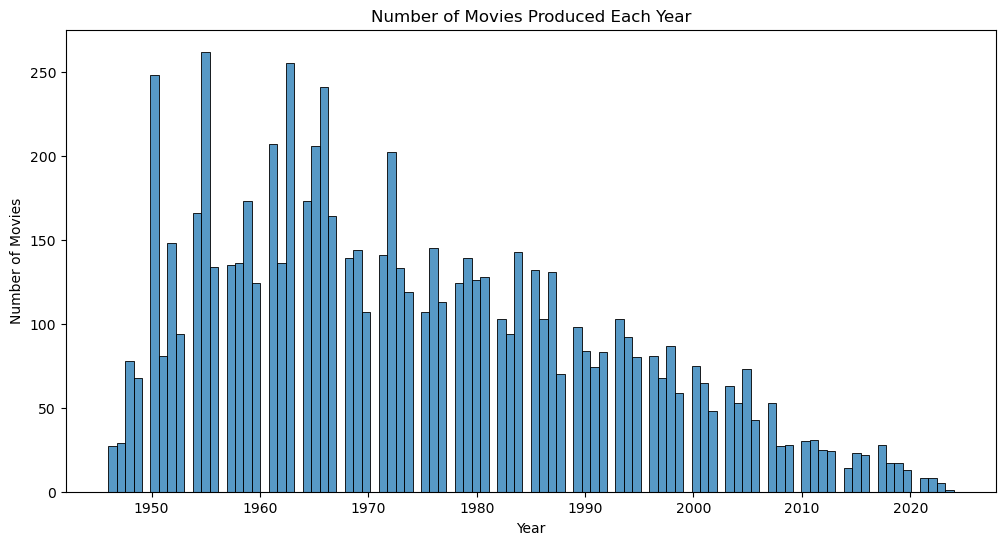

In [36]:
# Plot number of movies by start year
plt.figure(figsize=(12, 6))
sns.histplot(df2['startYear'], bins=100)
plt.title('Number of Movies Produced Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


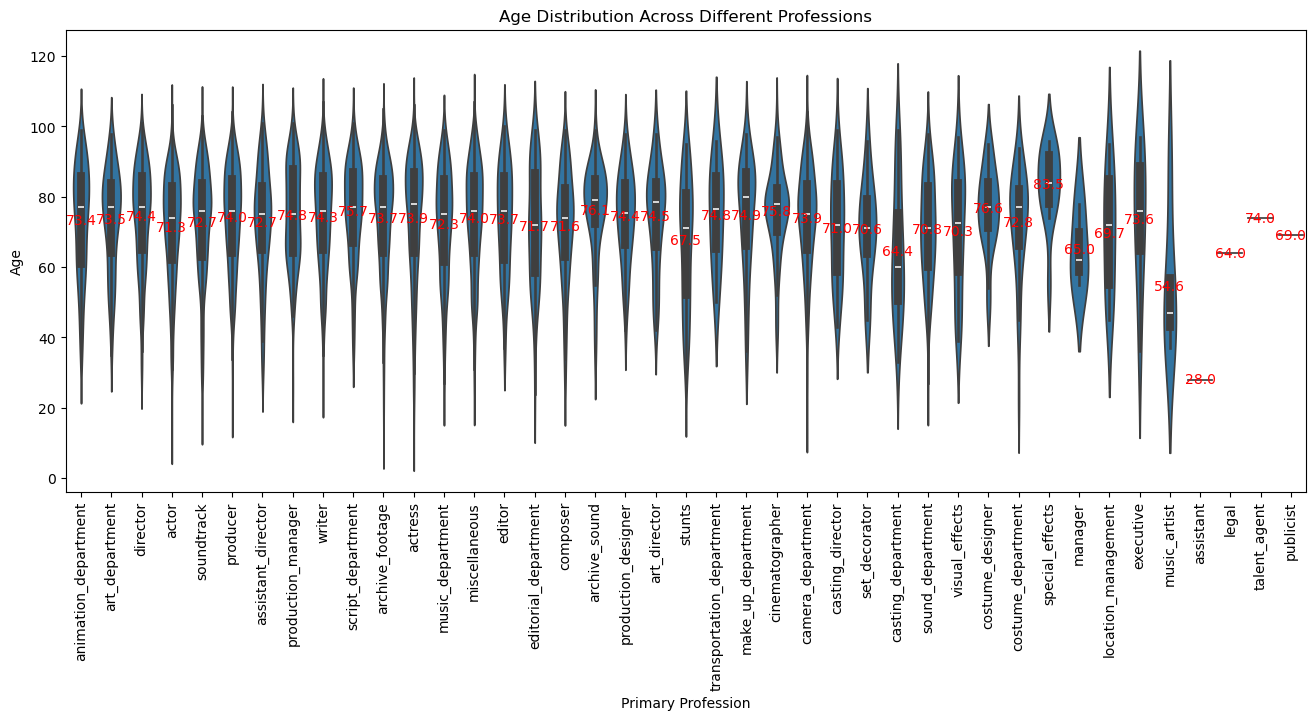

In [34]:

# Calculate age from birthYear
df2['age'] = df2['deathYear'] - df2['birthYear']

# Split multiple professions into individual rows
df2_expanded = df2.assign(primaryProfession=df2['primaryProfession'].str.split(',')).explode('primaryProfession')

# Plot age distribution by profession using a violin plot
plt.figure(figsize=(16, 6))
violin = sns.violinplot(data=df2_expanded, x='primaryProfession', y='age')
plt.xticks(rotation=90)
plt.title("Age Distribution Across Different Professions")
plt.xlabel("Primary Profession")
plt.ylabel("Age")

# Add average labels
for tick, label in enumerate(violin.get_xticklabels()): 
    profession = label.get_text() 
    avg_age = df2_expanded[df2_expanded['primaryProfession'] == profession]['age'].mean()
    plt.text(tick, avg_age, f'{avg_age:.1f}', ha='center', va='center', fontsize=10, color='Red')

plt.show()


C:\Users\anamikal singh\AppData\Local\Temp\ipykernel_18580\4280315727.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_genre.index, y=avg_rating_by_genre.values, palette='viridis')


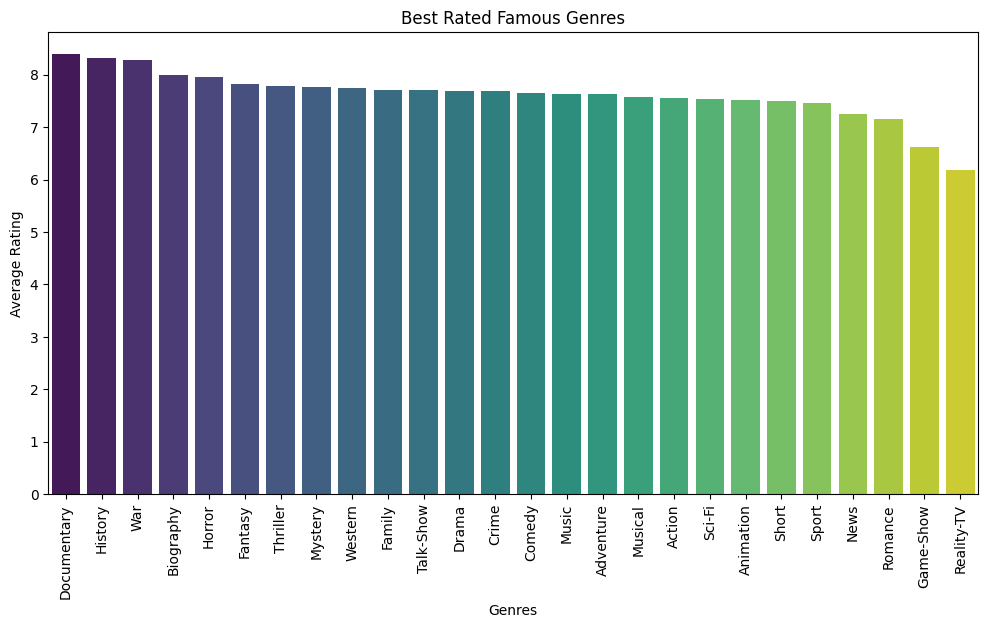

Top 10 Best Rated Genres:
genres
Documentary    8.391803
History        8.312500
War            8.276250
Biography      8.000000
Horror         7.962874
Fantasy        7.825561
Thriller       7.794937
Mystery        7.769512
Western        7.747619
Family         7.716232
Name: averageRating, dtype: float64


In [9]:
#Exploding the 'genres' column to separate each genre into its own row
df3 = df2.copy()  # Create a copy of the dataframe to avoid modifying the original
df3['genres'] = df3['genres'].str.split(',')  # Split the genres column into a list of genres
df3 = df3.explode('genres')  # Explode the genres into separate rows

# Now, df3 contains one row for each genre of a movie

#Filter out genres that have less than a certain threshold of votes to focus on 'famous' genres
vote_threshold = 1000  # You can adjust this threshold based on your dataset
df3_filtered = df3[df3['numVotes'] >= vote_threshold]

#Calculate the average rating for each genre
avg_rating_by_genre = df3_filtered.groupby('genres')['averageRating'].mean().sort_values(ascending=False)

#Plot the top-rated genres
plt.figure(figsize=(12,6))
sns.barplot(x=avg_rating_by_genre.index, y=avg_rating_by_genre.values, palette='viridis')
plt.xticks(rotation=90)
plt.title("Best Rated Famous Genres")
plt.xlabel("Genres")
plt.ylabel("Average Rating")
plt.show()

#Display the top-rated genres
print("Top 10 Best Rated Genres:")
print(avg_rating_by_genre.head(10))


C:\Users\anamikal singh\AppData\Local\Temp\ipykernel_18580\188945459.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='originalTitle', data=top_10_best_movies, palette='viridis')


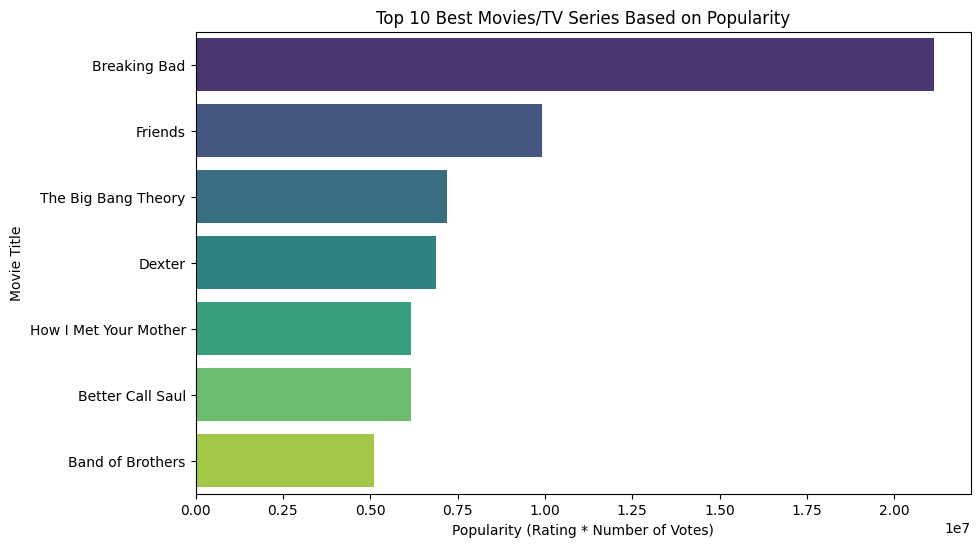

C:\Users\anamikal singh\AppData\Local\Temp\ipykernel_18580\188945459.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='originalTitle', data=top_10_worst_movies, palette='magma')


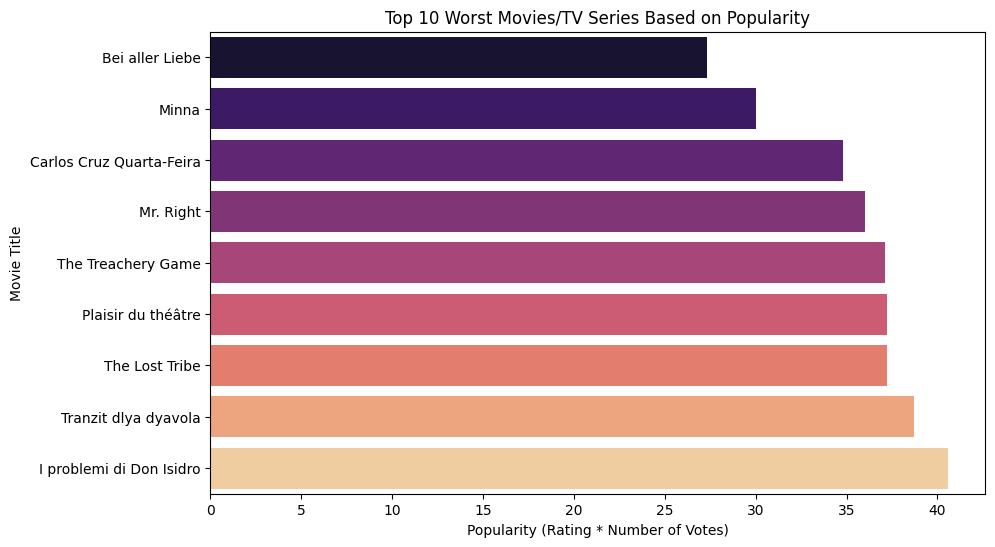

In [12]:
#Calculate the popularity score (rating * numVotes)
df2['popularity'] = df2['averageRating'] * df2['numVotes']

#Sort by popularity and get the top 10 best and worst movies
top_10_best_movies = df2[['originalTitle', 'averageRating', 'numVotes', 'popularity']].sort_values(by='popularity', ascending=False).head(10)
top_10_worst_movies = df2[['originalTitle', 'averageRating', 'numVotes', 'popularity']].sort_values(by='popularity').head(10)

# 1. Top 10 Best Movies (Horizontal Bar Plot)
plt.figure(figsize=(10,6))
sns.barplot(x='popularity', y='originalTitle', data=top_10_best_movies, palette='viridis')
plt.title("Top 10 Best Movies/TV Series Based on Popularity")
plt.xlabel("Popularity (Rating * Number of Votes)")
plt.ylabel("Movie/TVSeries Title")
plt.show()

# 2. Top 10 Worst Movies (Horizontal Bar Plot)
plt.figure(figsize=(10,6))
sns.barplot(x='popularity', y='originalTitle', data=top_10_worst_movies, palette='magma')
plt.title("Least 10 Popular Movies/TV Series")
plt.xlabel("Popularity (Rating * Number of Votes)")
plt.ylabel("Movie/TVSeries Title")
plt.show()


**RECOMMENDATION MODEL**

In [ ]:
# Load the dataset
file_path = 'data.xlsx'
df2 = pd.read_excel(file_path)

# Create a new dataframe (df3) from df2 for collaborative filtering
df3 = df2[['originalTitle', 'primaryName', 'averageRating', 'numVotes', 'genres']].dropna(subset=['originalTitle', 'primaryName', 'averageRating'])

In [ ]:
# Prepare the user-item interaction data
def prepare_data_for_user_selection(df3, selected_movies):
    user_interactions = []
    user_id = 1  # Simulate a single user for simplicity

    # For each selected movie, assume the user has interacted with it (rating based on its average rating)
    for movie in selected_movies:
        movie_data = df3[df3['originalTitle'] == movie]
        if not movie_data.empty:
            user_interactions.append([user_id, movie, movie_data['averageRating'].values[0]])
    
    # Create a DataFrame of user interactions
    interaction_df = pd.DataFrame(user_interactions, columns=['userId', 'itemId', 'rating'])
    return interaction_df

In [1]:
# Building and training the collaborative filtering model
def build_model(interaction_df):
    reader = Reader(rating_scale=(0, 10))  # Rating scale is between 0 and 10
    data = Dataset.load_from_df(interaction_df[['userId', 'itemId', 'rating']], reader)
    
#Train-test split
    trainset, testset = train_test_split(data, test_size=0.25)
    
#Training the SVD model by using Matrix Factorization
    algo = SVD()
    algo.fit(trainset)
    
#Evaluating the model
    predictions = algo.test(testset)
    rmse = accuracy.rmse(predictions)
    print(f"\nRMSE of the model: {rmse:.2f}")
    
    return algo

#Now Recommending movies based on user selection (influence of actors and ratings)
def recommend_movies(algo, interaction_df, df3, user_id):
    items = df3['originalTitle'].unique()  # All available movies
    seen_items = interaction_df[interaction_df['userId'] == user_id]['itemId'].values
    unseen_items = [item for item in items if item not in seen_items]

    recommendations = []
    for item in unseen_items:
#Predict ratings for unseen items
        est_rating = algo.predict(user_id, item).est
        recommendations.append((item, est_rating))
    
#Sorting recommendations by estimated rating
    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)
    
#Getting the top 10 recommendations
    return recommendations[:10]

#MainProg
if __name__ == "__main__":
#Randomly selecting 20 movies for the user to choose from
    random_movies = df3['originalTitle'].sample(n=20, random_state=42).tolist()
    print("Select 5 movies from the list below by typing their corresponding numbers:")
    for idx, movie in enumerate(random_movies, 1):
        print(f"{idx}. {movie}")
    
#Selecting only 5 movies
    movie_choices = input("\nEnter the numbers of the 5 movies you want to select (comma-separated): ")
    selected_movies = [random_movies[int(i) - 1] for i in movie_choices.split(",")]
    print(f"\nYou selected: {', '.join(selected_movies)}")
    
#Prepare interaction data based on the user's movie selection
    interaction_df = prepare_data_for_user_selection(df3, selected_movies)
    
    if interaction_df.empty:
        print("\nNo data available for your selected movies.")
    else:
#Trigger and build the collaborative filtering model
        algo = build_model(interaction_df)
        
#Output of Recommended movies based on the user's selection and preferences
        print("\nTop Recommended Movies based on your selection:")
        recommendations = recommend_movies(algo, interaction_df, df3, user_id=1)
        if recommendations:
            for title, rating in recommendations:
                print(f"{title}: Estimated Rating {rating:.2f}")
        else:
            print("No recommendations available.")

Select 5 movies from the list below by typing their corresponding numbers:
1. Lou Grant
2. Timm Thaler
3. The Brady Bunch
4. Division 4
5. December Bride
6. Petrocelli
7. A Mulher Invisível
8. George Burns Comedy Week
9. Telescope
10. Die Kriminalerzählung
11. Hunter
12. Greetings from Tucson
13. La banda de Pérez
14. The Merv Griffin Show
15. Quincy M.E.
16. M*A*S*H
17. Aplauso
18. The Big Pull
19. Burke's Law
20. The Merv Griffin Show



Enter the numbers of the 5 movies you want to select (comma-separated):  1,2,3,4,5



You selected: Lou Grant, Timm Thaler, The Brady Bunch, Division 4, December Bride
RMSE: 0.4194

RMSE of the model: 0.42

Top Recommended Movies based on your selection:
Kagaku ninja tai Gatchaman: Estimated Rating 7.72
The Adventures of Ellery Queen: Estimated Rating 7.72
The Client: Estimated Rating 7.72
The United States Steel Hour: Estimated Rating 7.72
The Jeffersons: Estimated Rating 7.72
Target: Estimated Rating 7.72
The Interpretaris: Estimated Rating 7.72
Salvage 1: Estimated Rating 7.72
Lights Out: Estimated Rating 7.72
Inside Detective: Estimated Rating 7.72
